In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from glob import glob

In [2]:
df_sample = pd.read_parquet('df.sample.parquet.gzip')

In [3]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 6733995 to 3615460
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype              
---  ------         --------------    -----              
 0   event_time     1000000 non-null  datetime64[ns, UTC]
 1   event_type     1000000 non-null  category           
 2   product_id     1000000 non-null  int64              
 3   category_id    1000000 non-null  uint64             
 4   category_code  1000000 non-null  object             
 5   brand          1000000 non-null  object             
 6   price          1000000 non-null  float32            
 7   user_id        1000000 non-null  int64              
dtypes: category(1), datetime64[ns, UTC](1), float32(1), int64(2), object(2), uint64(1)
memory usage: 58.2+ MB


In [4]:
df_sample

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id
6733995,2019-10-06 08:34:28+00:00,view,16700605,2053013559901684381,furniture.kitchen.chair,zeta,16.190001,518195082
4880941,2019-10-10 08:31:52+00:00,view,4800725,2053013554658804075,electronics.audio.headphone,sony,8.210000,512421337
6895456,2019-10-26 08:07:34+00:00,view,8800489,2053013555573162395,electronics.telephone,hiper,12.100000,518901124
807139,2019-10-07 06:33:45+00:00,cart,4201420,2053013552351936731,appliances.environment.air_conditioner,lg,787.630005,520085572
6297826,2019-10-25 18:07:49+00:00,view,1004739,2053013555631882655,electronics.smartphone,xiaomi,189.970001,513345774
...,...,...,...,...,...,...,...,...
6869328,2019-10-06 10:23:48+00:00,view,4801033,2053013554658804075,electronics.audio.headphone,plantronics,12.720000,539951385
3558299,2019-10-09 08:26:06+00:00,view,1004209,2053013555631882655,electronics.smartphone,samsung,88.809998,558028016
1358710,2019-10-07 15:03:40+00:00,view,1005156,2053013555631882655,electronics.smartphone,xiaomi,308.630005,546202941
471300,2019-10-01 09:56:51+00:00,view,2701588,2053013563911439225,appliances.kitchen.refrigerators,samsung,552.320007,536280812


## RFM 분석

In [5]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 6733995 to 3615460
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype              
---  ------         --------------    -----              
 0   event_time     1000000 non-null  datetime64[ns, UTC]
 1   event_type     1000000 non-null  category           
 2   product_id     1000000 non-null  int64              
 3   category_id    1000000 non-null  uint64             
 4   category_code  1000000 non-null  object             
 5   brand          1000000 non-null  object             
 6   price          1000000 non-null  float32            
 7   user_id        1000000 non-null  int64              
dtypes: category(1), datetime64[ns, UTC](1), float32(1), int64(2), object(2), uint64(1)
memory usage: 58.2+ MB


In [6]:
df_sample[df_sample['price'] == 0]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id
1219856,2019-10-01 21:10:16+00:00,view,1005184,2053013555631882655,electronics.smartphone,samsung,0.0,555791437
2505847,2019-10-08 12:49:02+00:00,view,1005208,2053013555631882655,electronics.smartphone,apple,0.0,557074215
4390162,2019-10-19 12:22:55+00:00,view,1005253,2053013555631882655,electronics.smartphone,xiaomi,0.0,553640282
61149,2019-10-21 10:02:25+00:00,view,21410743,2053013561579406073,electronics.clocks,tissot,0.0,536075133
5311158,2019-10-10 14:58:41+00:00,view,28401270,2053013566209917945,accessories.bag,karya,0.0,512478069
...,...,...,...,...,...,...,...,...
3060056,2019-10-08 19:29:49+00:00,view,1701552,2053013553031414015,computers.peripherals.monitor,acer,0.0,558198580
4400657,2019-10-09 19:21:10+00:00,view,45601628,2135658542781170420,apparel.shoes,kapika,0.0,539107833
5054262,2019-10-10 11:10:17+00:00,view,5100874,2053013553341792533,electronics.clocks,samsung,0.0,556657352
4364165,2019-10-24 11:58:45+00:00,view,1800579,2053013554415534427,electronics.video.tv,samsung,0.0,523495722


In [7]:
df_sample.describe()

,product_id,category_id,price,user_id
count,1.000000e+06,1.000000e+06,1000000.000000,1.000000e+06
mean,5.389488e+06,2.055721e+18,352.248322,5.341048e+08
std,8.388163e+06,1.568811e+16,380.233673,1.868646e+07
min,1.000978e+06,2.053014e+18,0.000000,2.398766e+08
25%,1.004856e+06,2.053014e+18,109.080002,5.160311e+08
50%,1.500348e+06,2.053014e+18,218.490005,5.308024e+08
75%,5.100337e+06,2.053014e+18,459.070007,5.524060e+08
max,6.050001e+07,2.173217e+18,2574.070068,5.662804e+08


array([[<AxesSubplot: title={'center': 'event_time'}>,
        <AxesSubplot: title={'center': 'product_id'}>],
       [<AxesSubplot: title={'center': 'category_id'}>,
        <AxesSubplot: title={'center': 'price'}>],
       [<AxesSubplot: title={'center': 'user_id'}>, <AxesSubplot: >]],
      dtype=object)

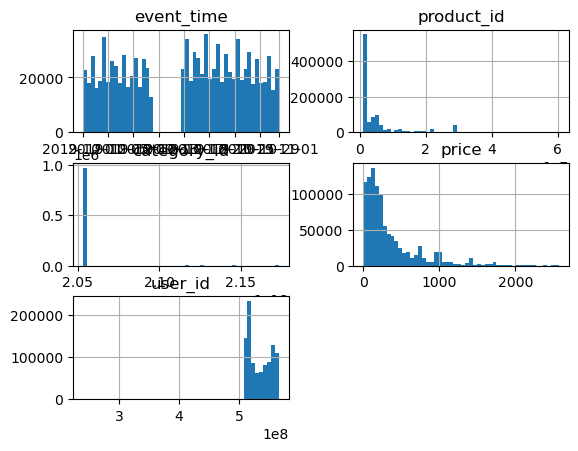

In [8]:
df_sample.hist(bins=50)

In [9]:
df_sample_pur = df_sample[df_sample['event_type'] == 'purchase']

In [10]:
df_sample_pur

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id
3426987,2019-10-23 16:38:27+00:00,purchase,1005204,2053013555631882655,electronics.smartphone,xiaomi,156.470001,512564650
3995206,2019-10-09 14:25:09+00:00,purchase,1005118,2053013555631882655,electronics.smartphone,apple,1015.200012,512736880
4641753,2019-10-10 04:55:02+00:00,purchase,1003316,2053013555631882655,electronics.smartphone,apple,931.789978,526929354
1203259,2019-10-17 08:44:34+00:00,purchase,1004903,2053013555631882655,electronics.smartphone,huawei,111.699997,552848662
2321640,2019-10-22 21:51:18+00:00,purchase,1002544,2053013555631882655,electronics.smartphone,apple,458.700012,516355074
...,...,...,...,...,...,...,...,...
6725651,2019-10-21 04:03:20+00:00,purchase,5000065,2053013566100866035,appliances.sewing_machine,janome,209.259995,540473225
4296173,2019-10-04 12:15:19+00:00,purchase,1307071,2053013558920217191,computers.notebook,acer,643.260010,512650236
982552,2019-10-17 05:54:59+00:00,purchase,1004250,2053013555631882655,electronics.smartphone,apple,798.229980,541860636
4248098,2019-10-24 10:13:20+00:00,purchase,1005105,2053013555631882655,electronics.smartphone,apple,1397.089966,513183786


In [11]:
last_timestamp = df_sample_pur['event_time'].max() + dt.timedelta(days=1)

In [12]:
rfm = df_sample_pur.groupby('user_id').agg({'event_time': lambda x : (last_timestamp - x.max()).days,
                                      'product_id' : 'count',
                                      'price' : 'sum'})

In [13]:
rfm.head(2)

,event_time,product_id,price
user_id,,,
435648894,26,1,388.130005
437371552,30,1,179.139999


In [14]:
# 컬럼값 변경하기 
rfm.columns = ['recency', 'frequency', 'monetary']

array([[<AxesSubplot: title={'center': 'recency'}>,
        <AxesSubplot: title={'center': 'frequency'}>],
       [<AxesSubplot: title={'center': 'monetary'}>, <AxesSubplot: >]],
      dtype=object)

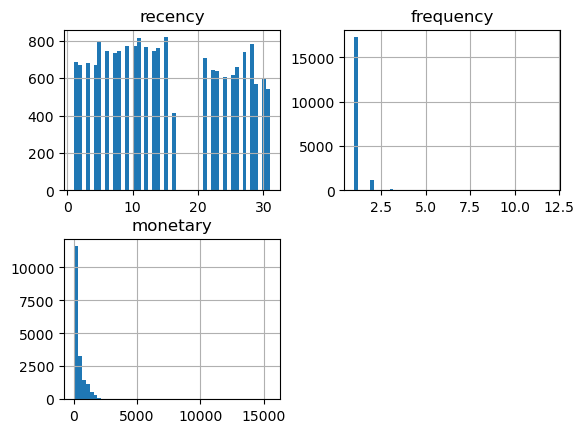

In [15]:
rfm.hist(bins=50)

In [16]:
# recency는 값이 낮을 수록 점수가 높다. 
# 최근에 구매한 고객이기 때문! 
list(range(5,0,-1))

[5, 4, 3, 2, 1]

In [17]:
# frequency와 monetary는 값이 높을 수록 높음
list(range(1,6))

[1, 2, 3, 4, 5]

In [18]:
r_labels = list(range(5,0,-1))
f_labels = list(range(1,6))
m_labels = list(range(1,6))
cut_size = 5

In [19]:
# 상대적인 계산이 필요하므로 qcut()으로 진행 
r_cut = pd.qcut(rfm['recency'].rank(method='first'), cut_size, labels=r_labels)


In [20]:
f_cut = pd.qcut(rfm['frequency'].rank(method='first'), cut_size, labels=f_labels)

In [21]:
m_cut = pd.qcut(rfm['monetary'].rank(method='first'), cut_size, labels=m_labels)

In [22]:
rfm = rfm.assign(R=r_cut, F=f_cut, M=m_cut)

In [23]:
rfm['rfm_segment'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)

In [24]:
rfm['rfm_score'] = rfm[['R','F','M']].sum(axis=1)

In [25]:
class_labels = ['silver', 'gold', 'platinum']

In [26]:
rfm['rfm_class'] = pd.qcut(rfm['rfm_score'], 3, labels=class_labels)
rfm

,recency,frequency,monetary,R,F,M,rfm_segment,rfm_score,rfm_class
user_id,,,,,,,,,
435648894,26,1,388.130005,2,1,4,214,7,silver
437371552,30,1,179.139999,1,1,2,112,4,silver
450756413,29,1,43.730000,1,1,1,111,3,silver
456810531,7,1,133.350006,4,1,2,412,7,silver
473668240,23,1,149.039993,2,1,2,212,5,silver
...,...,...,...,...,...,...,...,...,...
566188229,1,1,221.339996,5,5,3,553,13,platinum
566210490,1,1,514.780029,5,5,4,554,14,platinum
566227458,1,1,465.910004,5,5,4,554,14,platinum


In [27]:
rfm

,recency,frequency,monetary,R,F,M,rfm_segment,rfm_score,rfm_class
user_id,,,,,,,,,
435648894,26,1,388.130005,2,1,4,214,7,silver
437371552,30,1,179.139999,1,1,2,112,4,silver
450756413,29,1,43.730000,1,1,1,111,3,silver
456810531,7,1,133.350006,4,1,2,412,7,silver
473668240,23,1,149.039993,2,1,2,212,5,silver
...,...,...,...,...,...,...,...,...,...
566188229,1,1,221.339996,5,5,3,553,13,platinum
566210490,1,1,514.780029,5,5,4,554,14,platinum
566227458,1,1,465.910004,5,5,4,554,14,platinum


In [28]:
rfm.groupby('rfm_class')['rfm_score'].describe()

,count,mean,std,min,25%,50%,75%,max
rfm_class,,,,,,,,
silver,8366.0,6.608535,1.308346,3.0,6.0,7.0,8.0,8.0
gold,4870.0,9.486448,0.499868,9.0,9.0,9.0,10.0,10.0
platinum,5448.0,12.237518,1.248803,11.0,11.0,12.0,13.0,15.0


## 세부주제 3 : 집단별 어떤 브랜드, 카테고리 제품의 푸시 알림을 보내는게 좋을까?

- R : 최근 접속한 고객 집단
- F : 얼마나 자주 구매한 고객집단 
- M : 매출액을 챙겨주는 고객집단 

In [29]:
rfm

,recency,frequency,monetary,R,F,M,rfm_segment,rfm_score,rfm_class
user_id,,,,,,,,,
435648894,26,1,388.130005,2,1,4,214,7,silver
437371552,30,1,179.139999,1,1,2,112,4,silver
450756413,29,1,43.730000,1,1,1,111,3,silver
456810531,7,1,133.350006,4,1,2,412,7,silver
473668240,23,1,149.039993,2,1,2,212,5,silver
...,...,...,...,...,...,...,...,...,...
566188229,1,1,221.339996,5,5,3,553,13,platinum
566210490,1,1,514.780029,5,5,4,554,14,platinum
566227458,1,1,465.910004,5,5,4,554,14,platinum


## 카테고리, 브랜드 파생변수 만들기 

In [30]:
df_sample_pur

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id
3426987,2019-10-23 16:38:27+00:00,purchase,1005204,2053013555631882655,electronics.smartphone,xiaomi,156.470001,512564650
3995206,2019-10-09 14:25:09+00:00,purchase,1005118,2053013555631882655,electronics.smartphone,apple,1015.200012,512736880
4641753,2019-10-10 04:55:02+00:00,purchase,1003316,2053013555631882655,electronics.smartphone,apple,931.789978,526929354
1203259,2019-10-17 08:44:34+00:00,purchase,1004903,2053013555631882655,electronics.smartphone,huawei,111.699997,552848662
2321640,2019-10-22 21:51:18+00:00,purchase,1002544,2053013555631882655,electronics.smartphone,apple,458.700012,516355074
...,...,...,...,...,...,...,...,...
6725651,2019-10-21 04:03:20+00:00,purchase,5000065,2053013566100866035,appliances.sewing_machine,janome,209.259995,540473225
4296173,2019-10-04 12:15:19+00:00,purchase,1307071,2053013558920217191,computers.notebook,acer,643.260010,512650236
982552,2019-10-17 05:54:59+00:00,purchase,1004250,2053013555631882655,electronics.smartphone,apple,798.229980,541860636
4248098,2019-10-24 10:13:20+00:00,purchase,1005105,2053013555631882655,electronics.smartphone,apple,1397.089966,513183786


In [31]:
split_col = df_sample_pur['category_code'].str.split('.')

In [32]:
new_col = split_col.str[0]

In [33]:
df_sample_pur['category'] = new_col
df_sample_pur

/var/folders/yq/x6k6x6pn1799dnrdtwkc2y3c0000gn/T/ipykernel_32151/1334758186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample_pur['category'] = new_col


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,category
3426987,2019-10-23 16:38:27+00:00,purchase,1005204,2053013555631882655,electronics.smartphone,xiaomi,156.470001,512564650,electronics
3995206,2019-10-09 14:25:09+00:00,purchase,1005118,2053013555631882655,electronics.smartphone,apple,1015.200012,512736880,electronics
4641753,2019-10-10 04:55:02+00:00,purchase,1003316,2053013555631882655,electronics.smartphone,apple,931.789978,526929354,electronics
1203259,2019-10-17 08:44:34+00:00,purchase,1004903,2053013555631882655,electronics.smartphone,huawei,111.699997,552848662,electronics
2321640,2019-10-22 21:51:18+00:00,purchase,1002544,2053013555631882655,electronics.smartphone,apple,458.700012,516355074,electronics
...,...,...,...,...,...,...,...,...,...
6725651,2019-10-21 04:03:20+00:00,purchase,5000065,2053013566100866035,appliances.sewing_machine,janome,209.259995,540473225,appliances
4296173,2019-10-04 12:15:19+00:00,purchase,1307071,2053013558920217191,computers.notebook,acer,643.260010,512650236,computers
982552,2019-10-17 05:54:59+00:00,purchase,1004250,2053013555631882655,electronics.smartphone,apple,798.229980,541860636,electronics
4248098,2019-10-24 10:13:20+00:00,purchase,1005105,2053013555631882655,electronics.smartphone,apple,1397.089966,513183786,electronics


In [34]:
rfm

,recency,frequency,monetary,R,F,M,rfm_segment,rfm_score,rfm_class
user_id,,,,,,,,,
435648894,26,1,388.130005,2,1,4,214,7,silver
437371552,30,1,179.139999,1,1,2,112,4,silver
450756413,29,1,43.730000,1,1,1,111,3,silver
456810531,7,1,133.350006,4,1,2,412,7,silver
473668240,23,1,149.039993,2,1,2,212,5,silver
...,...,...,...,...,...,...,...,...,...
566188229,1,1,221.339996,5,5,3,553,13,platinum
566210490,1,1,514.780029,5,5,4,554,14,platinum
566227458,1,1,465.910004,5,5,4,554,14,platinum


In [35]:
df_sample_pur

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,category
3426987,2019-10-23 16:38:27+00:00,purchase,1005204,2053013555631882655,electronics.smartphone,xiaomi,156.470001,512564650,electronics
3995206,2019-10-09 14:25:09+00:00,purchase,1005118,2053013555631882655,electronics.smartphone,apple,1015.200012,512736880,electronics
4641753,2019-10-10 04:55:02+00:00,purchase,1003316,2053013555631882655,electronics.smartphone,apple,931.789978,526929354,electronics
1203259,2019-10-17 08:44:34+00:00,purchase,1004903,2053013555631882655,electronics.smartphone,huawei,111.699997,552848662,electronics
2321640,2019-10-22 21:51:18+00:00,purchase,1002544,2053013555631882655,electronics.smartphone,apple,458.700012,516355074,electronics
...,...,...,...,...,...,...,...,...,...
6725651,2019-10-21 04:03:20+00:00,purchase,5000065,2053013566100866035,appliances.sewing_machine,janome,209.259995,540473225,appliances
4296173,2019-10-04 12:15:19+00:00,purchase,1307071,2053013558920217191,computers.notebook,acer,643.260010,512650236,computers
982552,2019-10-17 05:54:59+00:00,purchase,1004250,2053013555631882655,electronics.smartphone,apple,798.229980,541860636,electronics
4248098,2019-10-24 10:13:20+00:00,purchase,1005105,2053013555631882655,electronics.smartphone,apple,1397.089966,513183786,electronics


In [36]:
rfm

,recency,frequency,monetary,R,F,M,rfm_segment,rfm_score,rfm_class
user_id,,,,,,,,,
435648894,26,1,388.130005,2,1,4,214,7,silver
437371552,30,1,179.139999,1,1,2,112,4,silver
450756413,29,1,43.730000,1,1,1,111,3,silver
456810531,7,1,133.350006,4,1,2,412,7,silver
473668240,23,1,149.039993,2,1,2,212,5,silver
...,...,...,...,...,...,...,...,...,...
566188229,1,1,221.339996,5,5,3,553,13,platinum
566210490,1,1,514.780029,5,5,4,554,14,platinum
566227458,1,1,465.910004,5,5,4,554,14,platinum


In [37]:
df_sample_pur['category'].value_counts()

electronics     15786
appliances       2585
computers        1023
auto              300
apparel           242
construction      192
kids              182
furniture         150
accessories        59
sport              34
medicine           16
stationery          4
country_yard        3
Name: category, dtype: int64

In [38]:
df_sample_pur

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,category
3426987,2019-10-23 16:38:27+00:00,purchase,1005204,2053013555631882655,electronics.smartphone,xiaomi,156.470001,512564650,electronics
3995206,2019-10-09 14:25:09+00:00,purchase,1005118,2053013555631882655,electronics.smartphone,apple,1015.200012,512736880,electronics
4641753,2019-10-10 04:55:02+00:00,purchase,1003316,2053013555631882655,electronics.smartphone,apple,931.789978,526929354,electronics
1203259,2019-10-17 08:44:34+00:00,purchase,1004903,2053013555631882655,electronics.smartphone,huawei,111.699997,552848662,electronics
2321640,2019-10-22 21:51:18+00:00,purchase,1002544,2053013555631882655,electronics.smartphone,apple,458.700012,516355074,electronics
...,...,...,...,...,...,...,...,...,...
6725651,2019-10-21 04:03:20+00:00,purchase,5000065,2053013566100866035,appliances.sewing_machine,janome,209.259995,540473225,appliances
4296173,2019-10-04 12:15:19+00:00,purchase,1307071,2053013558920217191,computers.notebook,acer,643.260010,512650236,computers
982552,2019-10-17 05:54:59+00:00,purchase,1004250,2053013555631882655,electronics.smartphone,apple,798.229980,541860636,electronics
4248098,2019-10-24 10:13:20+00:00,purchase,1005105,2053013555631882655,electronics.smartphone,apple,1397.089966,513183786,electronics


In [39]:
rfm_category = rfm.merge(df_sample_pur[['category', 'user_id', 'brand']], on='user_id')
rfm_category

,user_id,recency,frequency,monetary,R,F,M,rfm_segment,rfm_score,rfm_class,category,brand
0,435648894,26,1,388.130005,2,1,4,214,7,silver,electronics,samsung
1,437371552,30,1,179.139999,1,1,2,112,4,silver,electronics,oppo
2,450756413,29,1,43.730000,1,1,1,111,3,silver,appliances,gorenje
3,456810531,7,1,133.350006,4,1,2,412,7,silver,electronics,aria
4,473668240,23,1,149.039993,2,1,2,212,5,silver,appliances,kitfort
...,...,...,...,...,...,...,...,...,...,...,...,...
20571,566188229,1,1,221.339996,5,5,3,553,13,platinum,appliances,atlant
20572,566210490,1,1,514.780029,5,5,4,554,14,platinum,appliances,samsung
20573,566227458,1,1,465.910004,5,5,4,554,14,platinum,electronics,apple
20574,566246516,1,1,1661.089966,5,5,5,555,15,platinum,electronics,apple


## 카테고리 분석

### R 값 중 가장 큰 3개 카테고리 비교

In [40]:
r_category = pd.pivot_table(data=rfm_category, index='R', columns='category', values='frequency', aggfunc='sum')
r_columns_mean = r_category.mean()
r_sorted_columns = r_columns_mean.sort_values(ascending=False)
r_category = r_category[r_sorted_columns.index]
r_category_3 = r_category.iloc[:,:3]

In [41]:
r_category_3

category,electronics,appliances,computers
R,,,
5,5494,685,270
4,3964,603,282
3,4073,607,223
2,3792,514,229
1,3253,556,238


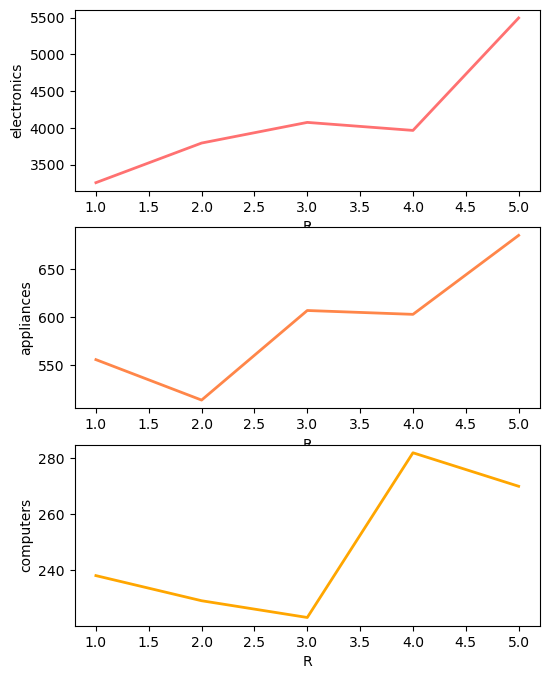

In [42]:
fig, axes = plt.subplots(3, 1, figsize=(6, 8))
sns.lineplot(r_category_3['electronics'], ax=axes[0], color='#ff7171', linewidth='2')
sns.lineplot(r_category_3['appliances'], ax=axes[1], color='#ff8649', linewidth='2')
sns.lineplot(r_category_3['computers'], ax=axes[2], color='#ffa600', linewidth='2');

- electronics, appliances는 R값이 증가할 수 록 구매 횟수가 많다. 
- computers는 R 값이 4일 때 가장 많은 구매율을 보여줌

### F 값 중 가장 큰 3개 카테고리 비교

In [43]:
f_category = pd.pivot_table(data=rfm_category, index='F', columns='category', values='frequency', aggfunc='sum')
f_columns_mean = f_category.mean()
f_sorted_columns = f_columns_mean.sort_values(ascending=False)
f_category = f_category[f_sorted_columns.index]
f_category_3 = f_category.iloc[:,:3]

In [44]:
f_category_3

category,electronics,appliances,computers
F,,,
1,2667,588,217
2,2739,556,202
3,2795,490,214
4,2932,428,167
5,9443,903,442


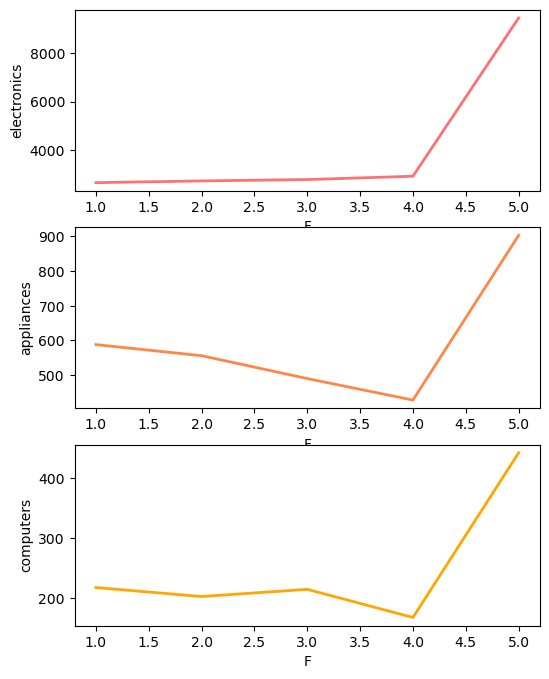

In [45]:
fig, axes = plt.subplots(3, 1, figsize=(6, 8))
sns.lineplot(f_category_3['electronics'], ax=axes[0], color='#ff7171', linewidth='2')
sns.lineplot(f_category_3['appliances'], ax=axes[1], color='#ff8649', linewidth='2')
sns.lineplot(f_category_3['computers'], ax=axes[2], color='#ffa600', linewidth='2');

- 구매건수가 높은 3가지 항목 모두 우상향을 보여줍니다. 

### M 값 중 가장 큰 3개 카테고리 비교

In [46]:
m_category = pd.pivot_table(data=rfm_category, index='M', columns='category', values='frequency', aggfunc='sum')
m_columns_mean = m_category.mean()
m_sorted_columns = m_columns_mean.sort_values(ascending=False)
m_category = m_category[m_sorted_columns.index]
m_category_3 = m_category.iloc[:,:3]

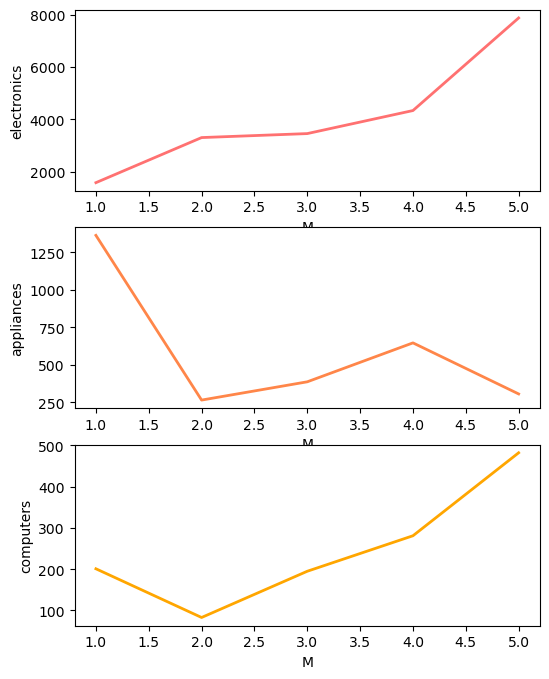

In [47]:
fig, axes = plt.subplots(3, 1, figsize=(6, 8))
sns.lineplot(m_category_3['electronics'], ax=axes[0], color='#ff7171', linewidth='2')
sns.lineplot(m_category_3['appliances'], ax=axes[1], color='#ff8649', linewidth='2')
sns.lineplot(m_category_3['computers'], ax=axes[2], color='#ffa600', linewidth='2');

- electornics와 computers 모두 우상향을 보여주지만, appliances의 경우에는 총 지출금액이 클 수록 구매횟수가 떨어진다.

### RFM class로 비교

In [48]:
rfm_category

,user_id,recency,frequency,monetary,R,F,M,rfm_segment,rfm_score,rfm_class,category,brand
0,435648894,26,1,388.130005,2,1,4,214,7,silver,electronics,samsung
1,437371552,30,1,179.139999,1,1,2,112,4,silver,electronics,oppo
2,450756413,29,1,43.730000,1,1,1,111,3,silver,appliances,gorenje
3,456810531,7,1,133.350006,4,1,2,412,7,silver,electronics,aria
4,473668240,23,1,149.039993,2,1,2,212,5,silver,appliances,kitfort
...,...,...,...,...,...,...,...,...,...,...,...,...
20571,566188229,1,1,221.339996,5,5,3,553,13,platinum,appliances,atlant
20572,566210490,1,1,514.780029,5,5,4,554,14,platinum,appliances,samsung
20573,566227458,1,1,465.910004,5,5,4,554,14,platinum,electronics,apple
20574,566246516,1,1,1661.089966,5,5,5,555,15,platinum,electronics,apple


In [49]:
class_category = pd.pivot_table(data=rfm_category, index='rfm_class',columns='category', values='frequency', aggfunc='sum')

In [50]:
class_category.style.background_gradient(cmap='Oranges')

category,accessories,apparel,appliances,auto,computers,construction,country_yard,electronics,furniture,kids,medicine,sport,stationery
rfm_class,,,,,,,,,,,,,
silver,47,171,1503,232,400,120,3,5744,86,120,11,19,4
gold,10,60,656,64,279,43,0,4061,40,43,4,6,0
platinum,16,47,806,33,563,56,0,10771,46,53,3,12,0


- 위 시각화를 보면 어떤 rfm class에 따라 어떤 카테고리의 구매율이 높은 지 볼 수 있습니다. 
- rfm_class 중 플레티넘 클래스는 컴퓨터와 가전제품 구매건수가 높았고 
- 나머지 카테고리 모두 rfm_class가 실버인 회원들의 구매건수가 높았습니다.

## 브랜드 분석

In [51]:
rfm_category

,user_id,recency,frequency,monetary,R,F,M,rfm_segment,rfm_score,rfm_class,category,brand
0,435648894,26,1,388.130005,2,1,4,214,7,silver,electronics,samsung
1,437371552,30,1,179.139999,1,1,2,112,4,silver,electronics,oppo
2,450756413,29,1,43.730000,1,1,1,111,3,silver,appliances,gorenje
3,456810531,7,1,133.350006,4,1,2,412,7,silver,electronics,aria
4,473668240,23,1,149.039993,2,1,2,212,5,silver,appliances,kitfort
...,...,...,...,...,...,...,...,...,...,...,...,...
20571,566188229,1,1,221.339996,5,5,3,553,13,platinum,appliances,atlant
20572,566210490,1,1,514.780029,5,5,4,554,14,platinum,appliances,samsung
20573,566227458,1,1,465.910004,5,5,4,554,14,platinum,electronics,apple
20574,566246516,1,1,1661.089966,5,5,5,555,15,platinum,electronics,apple


### R 값 중 가장 큰 3개 카테고리 비교

In [52]:
r_brand = pd.pivot_table(data=rfm_category, index='R', columns='brand', values='frequency', aggfunc='sum')
r_columns_mean = r_brand.mean()
r_sorted_columns = r_columns_mean.sort_values(ascending=False)
r_brand = r_brand[r_sorted_columns.index]
r_brand_3 = r_brand.iloc[:,:3]

In [53]:
r_brand

brand,samsung,apple,xiaomi,huawei,oppo,lg,acer,indesit,artel,lenovo,...,nutribullet,burgerschuhe,olto,brother,pablosky,blackberry,parkmaster,peavey,pedrollo,optoma
R,,,,,,,,,,,,,,,,,,,,,
5,2186,2128,530,223,119,117,69,70,71,34,...,0,0,0,0,1,0,1,1,0,0
4,1672,1347,478,159,95,79,82,46,40,40,...,1,0,0,0,0,0,0,0,0,1
3,1665,1448,418,241,91,87,68,50,34,47,...,0,0,0,0,0,0,0,0,1,0
2,1506,1253,408,226,79,44,45,36,52,45,...,0,1,0,1,0,1,0,0,0,0
1,1281,1106,351,198,85,69,65,36,41,52,...,0,0,1,0,0,0,0,0,0,0


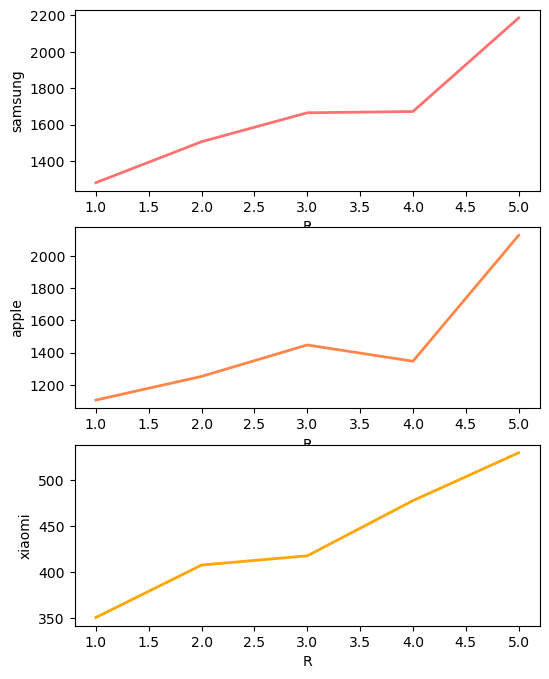

In [54]:
fig, axes = plt.subplots(3, 1, figsize=(6, 8))
sns.lineplot(r_brand_3['samsung'], ax=axes[0], color='#ff7171', linewidth='2')
sns.lineplot(r_brand_3['apple'], ax=axes[1], color='#ff8649', linewidth='2')
sns.lineplot(r_brand_3['xiaomi'], ax=axes[2], color='#ffa600', linewidth='2');

- 3개의 브랜드 모두 우상향 하고 있습니다
- 대부분 가장 최근에 구매함

### F값 중 가장 큰 3개 카테고리 비교

In [55]:
f_brand = pd.pivot_table(data=rfm_category, index='F', columns='brand', values='frequency', aggfunc='sum')
f_columns_mean = f_brand.mean()
f_sorted_columns = f_columns_mean.sort_values(ascending=False)
f_brand = f_brand[f_sorted_columns.index]
f_brand_3 = f_brand.iloc[:,:3]

In [56]:
f_brand

brand,samsung,apple,xiaomi,huawei,oppo,lg,acer,indesit,artel,lenovo,...,nutribullet,burgerschuhe,olto,brother,pablosky,blackberry,parkmaster,peavey,pedrollo,optoma
F,,,,,,,,,,,,,,,,,,,,,
1,974,990,320,150,59,51,53,53,27,23,...,0,0,0,0,0,0,0,0,0,0
2,1057,1000,321,136,66,63,48,43,34,42,...,0,1,0,1,0,0,1,0,0,0
3,1144,937,306,142,74,52,67,27,34,42,...,0,0,0,0,0,1,0,0,0,1
4,1291,867,321,164,88,45,48,32,45,36,...,0,0,1,0,1,0,0,1,0,0
5,3844,3488,917,455,182,185,113,83,98,75,...,1,0,0,0,0,0,0,0,1,0


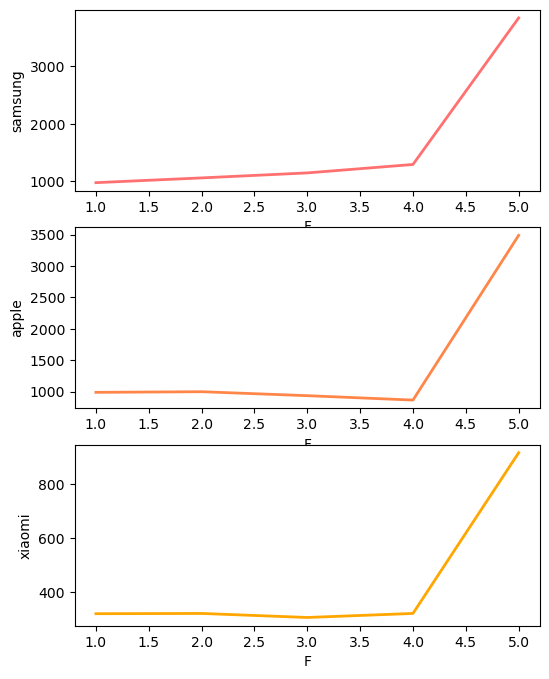

In [57]:
fig, axes = plt.subplots(3, 1, figsize=(6, 8))
sns.lineplot(f_brand_3['samsung'], ax=axes[0], color='#ff7171', linewidth='2')
sns.lineplot(f_brand_3['apple'], ax=axes[1], color='#ff8649', linewidth='2')
sns.lineplot(f_brand_3['xiaomi'], ax=axes[2], color='#ffa600', linewidth='2');

- 모든 브랜드가 우상향
- 대부분 많은 사람들이 자주 구매함

### M값 중 가장 큰 3개 카테고리 비교

In [58]:
m_brand = pd.pivot_table(data=rfm_category, index='M', columns='brand', values='frequency', aggfunc='sum')
m_columns_mean = m_brand.mean()
m_sorted_columns = m_columns_mean.sort_values(ascending=False)
m_brand = m_brand[f_sorted_columns.index]
m_brand_3 = m_brand.iloc[:,:3]

f_brand = pd.pivot_table(data=rfm_category, index='F', columns='brand', values='frequency', aggfunc='sum')
f_columns_mean = f_brand.mean()
f_sorted_columns = f_columns_mean.sort_values(ascending=False)
f_brand = f_brand[f_sorted_columns.index]
f_brand_3 = f_brand.iloc[:,:3]

In [59]:
m_brand

brand,samsung,apple,xiaomi,huawei,oppo,lg,acer,indesit,artel,lenovo,...,nutribullet,burgerschuhe,olto,brother,pablosky,blackberry,parkmaster,peavey,pedrollo,optoma
M,,,,,,,,,,,,,,,,,,,,,
1,369,27,451,195,9,17,5,0,73,10,...,1,1,1,1,1,0,1,0,0,0
2,1935,431,261,247,250,11,4,38,73,2,...,0,0,0,0,0,0,0,0,0,0
3,2105,137,667,271,41,23,51,84,36,73,...,0,0,0,0,0,0,0,0,0,0
4,1804,1609,482,172,131,207,93,79,26,73,...,0,0,0,0,0,1,0,1,0,1
5,2097,5078,324,162,38,138,176,37,30,60,...,0,0,0,0,0,0,0,0,1,0


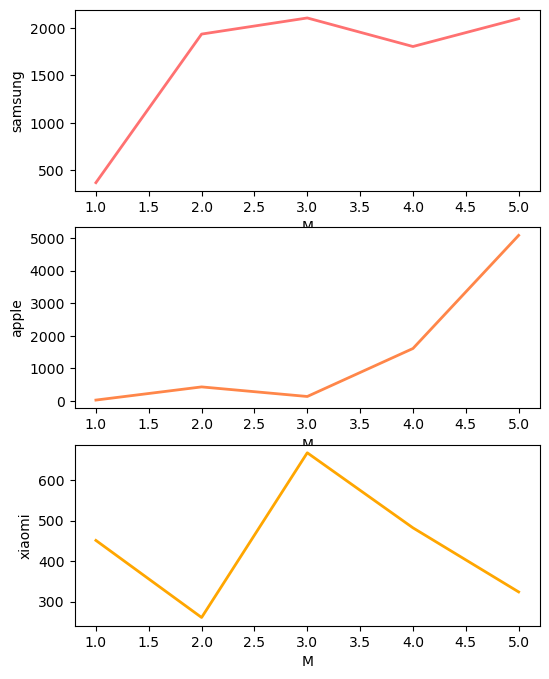

In [60]:
fig, axes = plt.subplots(3, 1, figsize=(6, 8))
sns.lineplot(m_brand_3['samsung'], ax=axes[0], color='#ff7171', linewidth='2')
sns.lineplot(m_brand_3['apple'], ax=axes[1], color='#ff8649', linewidth='2')
sns.lineplot(m_brand_3['xiaomi'], ax=axes[2], color='#ffa600', linewidth='2');

- 특이하게 지출 내역을 비교했을 때 삼성은 중저가부터 고가까지 판매가 고루 이루어지고 평균 가격대가 높은 애플은 대부분 높은 지출 내역을 보입니다. 
- 반면 샤오미의 경우 높은 가격대의 상품에 대한 판매보다는 중저가 제품에 대한 판매가 주로 이루어 집니다.

### 브랜드 RFM class 비교

In [61]:
class_brand = pd.pivot_table(data=rfm_category, index='rfm_class',columns='brand', values='frequency', aggfunc='sum')

In [62]:
class_brand.style.background_gradient(cmap='Oranges')

brand,acer,acme,acv,adamex,adata,adidas,admira,aerocool,aimoto,akai,akg,akpo,alesis,alis,alligator,almacom,alphard,alpine,alteco,alvitek,amazon,amd,ams,anex,anytek,aoc,apacer,apple,aqua,arg,aria,ariston,armani,arnica,artel,arua,asel,asics,asrock,aston,asus,atlant,atlantic,atrai,audio-technica,author,autoprofi,ava,awei,axis,babykiss,babytime,babyzen,baden,ballu,bambini,bambola,barbie,barneo,barty,basic,bbk,beats,beko,belashoff,belecoo,bene,bernina,bertoni,bestoy,blackberry,blaupunkt,boccia,bosch,bosher,bq,braun,brother,brw,bts,burgerschuhe,calorie,candy,canon,canyon,caprice,casio,cenmax,centurion,changhong,chayka,chicco,cnd,coccinelle,comfee,conceptclub,continent,cort,cortland,cougar,covani,cover,crosby,crown,crucial,crusader,cybex,dahon,danielklein,darina,dauscher,decoroom,deepcool,defender,dell,delonghi,delux,deluxe,denn,denzel,destra,dewalt,dickie,diesel,disney,ditreex,domini,domyos,doogee,dremel,dwt,dxracer,dyson,ecocool,edge,edon,elari,electrolux,element,elenberg,elica,elikor,epson,ergo,ersport,escada,escan,etor,eurolux,fabretti,fancy,fassen,fender,festool,fila,first,fisher-price,fisherman,flama,fly,forza,fossil,fresh,fubag,fujida,gainward,galanz,galaxy,gamemax,garanterm,garmin,garvalin,gefest,geil,genau,genius,gezatone,giant,gigabyte,goo.n,gopro,gorenje,gree,greentek,grohe,grow-with-me,gulliver,haier,hansa,harper,hertz,heyner,hiper,hisense,hoco,homage,honor,hoover,horizont,hotpoint-ariston,housefit,hp,htc,huawei,huggies,huion,huter,hyperx,hyundai,ibox,ikea,imperial,imx,incanto,indesit,inoi,intel,irbis,irobot,jabra,jaguar,janome,jbl,jet,jetair,jinga,joie,joyor,jvc,kaiser,karcher,karya,kenwood,kicx,kingston,kitfort,kivi,klima,kolner,kristal,kronwerk,kugoo,ladida,laurastar,leadbros,leader,legre,lenovo,leo,lexmark,lg,llorens,logitech,longstyle,longway,lorelli,lorelli-bertoni,lumme,luxell,m-audio,magnetta,makita,manuoki,maomaoku,marcomen,marshall,mateus,maunfeld,maxvi,maxwell,mbs,mebels,meizu,merries,micio,microlab,microsoft,midea,milavitsa,millionaire,moony,morel,moulinex,msi,muqajankz,mykronoz,mystery,nakamichi,nania,neo,neoline,netechnics,nexpero,nexttab,nika,nike,nikon,ninebot,nobby,nokia,nutribullet,oasis,olmio,olto,omron,oneplus,oppo,optoma,orient,oursson,p.i.t.,pablosky,palit,pampers,panasonic,pandora,parkmaster,peavey,pedrollo,peg-perego,perilla,petek,phantom,philips,phoenix,picard,pioneer,pituso,plantronics,plextor,pocketbook,polaris,polini,portcase,pozis,prestigio,pride,pro-karaoke,promozer,pulser,puma,qmax,racer,rals,ramili,rant,rapoo,rastar,razer,rebus,redmond,redragon,reebok,remington,remonte,renova,respect,rieker,riko,ritmix,rivacase,rockdale,romanson,rombica,rondell,rooman,rosa,rowenta,ryobi,sakura,salamander,samsonite,samsung,sanita,santeri,saturn,scarlett,seagate,selby,sennheiser,shagovita,shenma,shivaki,sho-me,shure,silverlit,simba,simfer,sinotex,sjcam,sly,smart,smeg,smile,sony,spinmaster,stanley,starline,steelseries,stels,stendmebel,stihl,strobbs,suave,subini,superfine,sv,sven,swat,swatch,syma,takamine,tamaris,tanglewood,tcl,tecno,tefal,teploross,texet,thermaltake,thermex,thomas,thule,timberk,tissot,tomahawk,torrent,toshiba,total,toyota,tp-link,triton,troyka,trust,tucano,turbo,turboair,unit,usams,veho,vestel,viewsonic,vinzer,vitek,vivo,wacom,whirlpool,willmark,wilson,winca,wingoffly,wonlex,x-game,xerox,xiaomi,xp-pen,yamaha,yasin,yoya,zelmer,zeppelin,zeta,zinc,zlatek,zotac,zte
rfm_class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
silver,57,1,1,0,2,2,0,3,14,2,2,0,1,5,1,5,8,9,12,3,1,1,1,0,2,1,6,1134,4,14,1,37,1,1,112,1,11,5,3,1,15,11,3,3,2,0,1,4,3,5,0,3,3,23,14,0,1,1,0,1,0,1,2,48,1,19,2,0,4,5,0,0,

In [63]:
class_brand['acer'].max()

177

In [64]:
push_list = class_brand.transpose()
push_list

rfm_class,silver,gold,platinum
brand,,,
acer,57,95,177
acme,1,1,0
acv,1,0,0
adamex,0,1,0
adata,2,0,0
...,...,...,...
zeta,21,3,3
zinc,1,0,0
zlatek,9,1,2


In [65]:
for i in range(466) :
    push_list.iloc[i,:] = push_list.iloc[i,:].rank(method='first', ascending=False).astype(int)

In [66]:
push_list

rfm_class,silver,gold,platinum
brand,,,
acer,3,2,1
acme,1,2,3
acv,1,2,3
adamex,2,1,3
adata,1,2,3
...,...,...,...
zeta,1,2,3
zinc,1,2,3
zlatek,1,3,2


<AxesSubplot: ylabel='brand'>

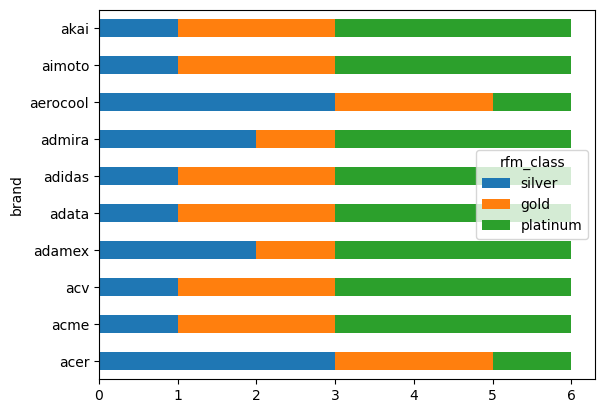

In [67]:
push_list.iloc[:10,:].plot.barh(stacked=True)

In [68]:
brand_platinum = push_list[push_list['platinum'] == 1].index.to_list()
brand_platinum[:10]

['acer',
 'aerocool',
 'akpo',
 'apple',
 'armani',
 'arnica',
 'asus',
 'audio-technica',
 'author',
 'beko']

In [69]:
brand_gold = push_list[push_list['gold'] == 1].index.to_list()
brand_gold[:10]

['adamex',
 'admira',
 'anex',
 'babykiss',
 'bambini',
 'barneo',
 'basic',
 'bernina',
 'blackberry',
 'candy']

In [70]:
brand_silver = push_list[push_list['silver'] == 1].index.to_list()
brand_silver[:10]

['acme',
 'acv',
 'adata',
 'adidas',
 'aimoto',
 'akai',
 'akg',
 'alesis',
 'alis',
 'alligator']

<AxesSubplot: xlabel='recency', ylabel='count'>

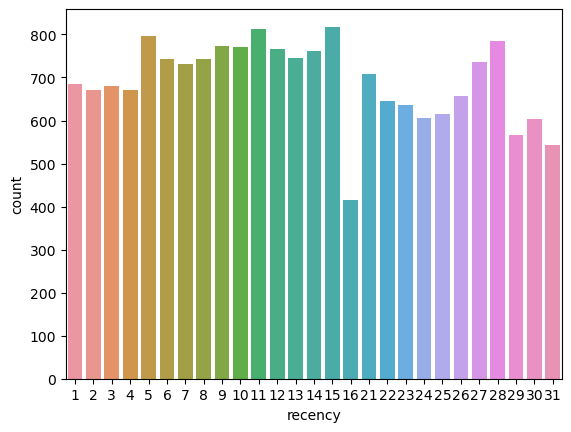

In [73]:
sns.countplot(data=rfm, x="recency")